<a href="https://colab.research.google.com/github/dhender77/Coursework/blob/main/Notebook5_Henderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \#5: SVM, Perceptron, SGD, and PCA
**Due:** Tuesday 11/9, by 11:59pm

Name:

**Exercises**: \\
Build a **default model** for each of the following and then build a model with **one parameter tuned** (no need to include a graph, just change one parameter that hopefully results in a better model):
1. Support Vector Machines
2. Perceptron
3. Stochastic Gradient Descent
4. Run a PCA on the best model
5. Answer the conclusion questions


In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
data= pd.read_csv('/content/drive/MyDrive/CS 167/breast-cancer-wisconsin-data.csv')
data.head()

Mounted at /content/drive


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#we need to drop the last column 'Unnamed: 32'
data.drop(labels='Unnamed: 32', axis=1, inplace=True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


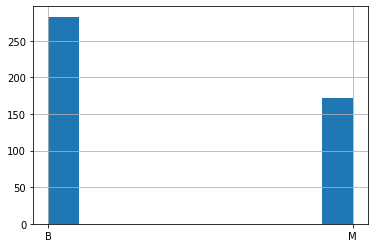

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


predictors = data.columns.drop('diagnosis')
target = "diagnosis"

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#Normalize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
train_sln.hist()
#now you can use train_data, test_data, train_sln, and test_sln

## Exercises:
1. Support Vector Classifier: \\
  a. Default \\
  b. Tuned

In [ ]:
#Default SVC
from sklearn.svm import SVC
from sklearn import metrics
clf = SVC()
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)
print("Accuracy:", accuracy_score(test_sln, predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))


Accuracy: 0.9824561403508771
     Pred M  Pred B
T M      39       1
T B       1      73


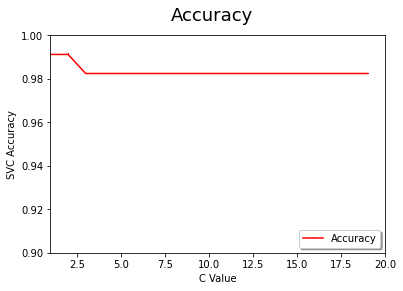

In [ ]:
#Tuned SVC:
x = 20
series = []
for i in range(1,x):
  clf = SVC(kernel = 'linear', C = i)
  clf.fit(train_data,train_sln)
  predictions = clf.predict(test_data)
  val = accuracy_score(test_sln, predictions)
  series.append(val)

import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, x)
plt.suptitle('Accuracy', fontsize=18)
plt.xlabel('C Value')
plt.ylabel('SVC Accuracy')
plt.plot(xvals, series, 'r,-', label='Accuracy')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, x, .9, 1])
plt.show()


In [ ]:
clf_t = SVC(kernel = 'linear', C = 2 )
clf_t.fit(train_data,train_sln)
predictions = clf_t.predict(test_data)
print("Accuracy:", accuracy_score(test_sln, predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))



Accuracy: 0.9912280701754386
     Pred M  Pred B
T M      39       1
T B       0      74


2. Perceptron: \\
  a. Default \\
  b. Tuned

In [ ]:
#Default Perceptron
from sklearn.linear_model import Perceptron
import warnings
warnings.filterwarnings("ignore")
perc = Perceptron()
perc.fit(train_data,train_sln)
perc_predictions = perc.predict(test_data)

#output accuracy
print("Accuracy:", metrics.accuracy_score(test_sln, perc_predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, perc_predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

Accuracy: 0.9824561403508771
     Pred M  Pred B
T M      39       1
T B       1      73


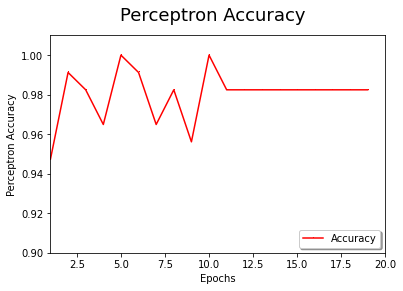

In [ ]:
#Tuned Perceptron
x = 20
series1 = []
for i in range(1,x):
  perc = Perceptron(max_iter = i)
  perc.fit(train_data,train_sln)
  perc_predictions = perc.predict(test_data)
  val = metrics.accuracy_score(test_sln, perc_predictions)
  series1.append(val)

import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, x)
plt.suptitle('Perceptron Accuracy', fontsize=18)
plt.xlabel('Epochs')
plt.ylabel('Perceptron Accuracy')
plt.plot(xvals, series1, 'r,-', label='Accuracy')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, x, .9, 1.01])
plt.show()

In [ ]:
perc = Perceptron(max_iter = 5)
perc.fit(train_data,train_sln)
perc_predictions = perc.predict(test_data)

#output accuracy
print("Accuracy:", metrics.accuracy_score(test_sln, perc_predictions))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, perc_predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

Accuracy: 1.0
     Pred M  Pred B
T M      40       0
T B       0      74


3. Stochastic Gradient Descent: \\
  a. Default \\
  b. Tuned

In [ ]:
#Default SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(train_data,train_sln)
sgd_predictions = sgd.predict(test_data)
print("Accuracy:", metrics.accuracy_score(test_sln, sgd_predictions ))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, sgd_predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

Accuracy: 1.0
     Pred M  Pred B
T M      40       0
T B       0      74


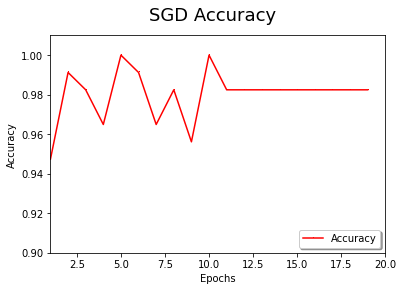

In [ ]:
#Tuned SGD
x  = 20
series2 = []
for i in range(1,x):
  sgd = SGDClassifier(max_iter = i)
  sgd.fit(train_data,train_sln)
  sgd_predictions = sgd.predict(test_data)
  val = metrics.accuracy_score(test_sln, sgd_predictions )
  series2.append(val)

import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, x)
plt.suptitle('SGD Accuracy', fontsize=18)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(xvals, series1, 'r,-', label='Accuracy')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, x, .9, 1.01])
plt.show()

In [ ]:
sgd = SGDClassifier(max_iter = 5)
sgd.fit(train_data,train_sln)
sgd_predictions = sgd.predict(test_data)
print("Accuracy:", metrics.accuracy_score(test_sln, sgd_predictions ))
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, sgd_predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

Accuracy: 1.0
     Pred M  Pred B
T M      40       0
T B       0      74


3. Now take the model that performed the best above and run a **principal component analysis** on it. 

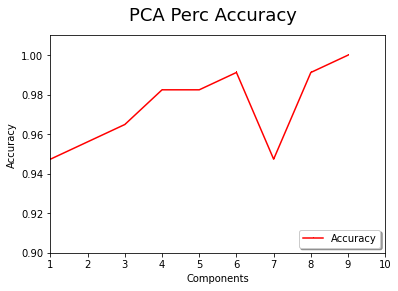

In [ ]:
from sklearn.decomposition import PCA

x = 10
series4 = []
for i in range(1,x):
  extractor = PCA(n_components= i, whiten=True)
  #When fitting with PCA, you do not use the target column - this is an unsupervised learning algorithm
  extractor.fit(train_data)
  train_transformed = extractor.transform(train_data)
  test_transformed = extractor.transform(test_data)
  perc = Perceptron(max_iter = 5)
  perc.fit(train_transformed,train_sln)
  perc_predictions = perc.predict(test_transformed)
  val = metrics.accuracy_score(test_sln, perc_predictions)
  series4.append(val)

import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, x)
plt.suptitle('PCA Perc Accuracy', fontsize=18)
plt.xlabel('Components')
plt.ylabel('Accuracy')
plt.plot(xvals, series4, 'r,-', label='Accuracy')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, x, .9, 1.01])
plt.show()


In [ ]:
#PCA on best model
#We could use either the Perceptron or the SGA, both were 100% accuracy. Let's use Perceptron


extractor = PCA(n_components=9, whiten=True)
#When fitting with PCA, you do not use the target column - this is an unsupervised learning algorithm
extractor.fit(train_data)
print('this is the variance/importance of each component')
print(extractor.explained_variance_ratio_)



this is the variance/importance of each component
[0.43662428 0.18150759 0.09119096 0.06425565 0.05247359 0.03960981
 0.03192486 0.02141266 0.01372727]


In [ ]:
train_transformed = extractor.transform(train_data)
test_transformed = extractor.transform(test_data)

In [ ]:
perc = Perceptron(max_iter = 5)
perc.fit(train_transformed,train_sln)
perc_predictions = perc.predict(test_transformed)

#output accuracy
print("Accuracy:", metrics.accuracy_score(test_sln, perc_predictions))

Accuracy: 1.0


## Conclusions:
a. Which model performed the best? Why do you think this model performed the best? \\
b. What effect did the principal component analysis have on the accuracy of your best model? Why do you think this is the case?

a. Both the Perceptron and SGA got 100% accuracy with tuning. The default SGA got 100% accuracy. I think the Perceptron got 100% accuracy because it was able to immediately find the best weights for the columns. The SGA got 100% accuracy because it was able to use the entire training set to minimize error.

b. The principal component analysis just kept the accuracy the same (100%). It was probably able to do this because it can reduce the dimensionality of the data and ensure that each of the predictor variables are independent of one another. This simplifies the data and makes it easier for the perceptron to choose weights.